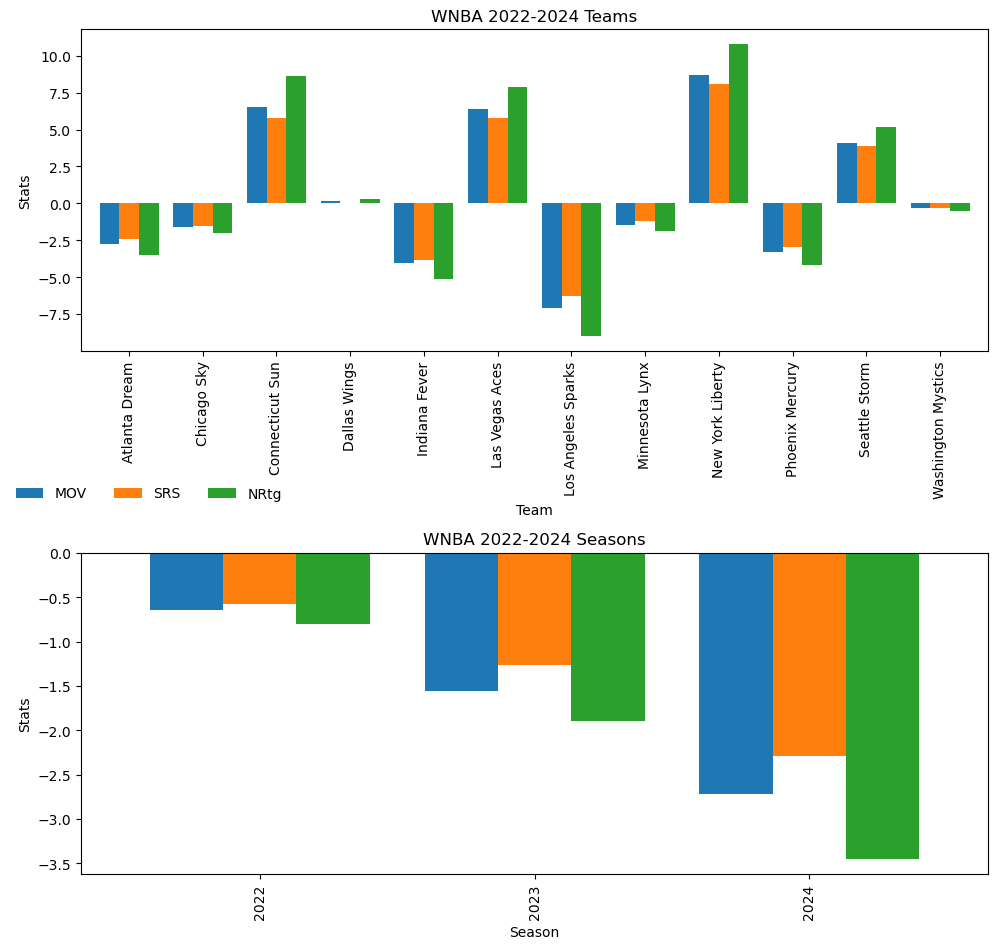

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned WNBA data
file_path = '/Users/lizvitai/Documents/PythonSports/wnba_advanced_stats_cleaned.csv'
df = pd.read_csv(file_path)

# Group by team and calculate median for the chosen stats
team_grouped = df.groupby('Team').agg({
    'MOV': 'median',
    'SRS': 'median',
    'NRtg': 'median'
}).reset_index()

# Group by season and calculate median for the chosen stats
season_grouped = df.groupby('Season').agg({
    'MOV': 'median',
    'SRS': 'median',
    'NRtg': 'median'
}).reset_index()

# Convert Season to integers for cleaner display
season_grouped['Season'] = season_grouped['Season'].astype(int)

# Create subplots for team-level and season-level stats
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Plot for team-level stats
team_grouped.plot(x='Team', y=['MOV', 'SRS', 'NRtg'], kind='bar', ax=axs[0], width=0.8);
axs[0].set_title('WNBA 2022-2024 Teams')
axs[0].set_xlabel('Team')
axs[0].set_ylabel('Stats')

# Plot for season-level stats
season_grouped.plot(x='Season', y=['MOV', 'SRS', 'NRtg'], kind='bar', ax=axs[1], width=0.8);
axs[1].set_title('WNBA 2022-2024 Seasons')
axs[1].set_xlabel('Season')
axs[1].set_ylabel('Stats')

# Remove the individual legends from each subplot
axs[0].get_legend().remove()
axs[1].get_legend().remove()

# Add a single legend to be placed between the two graphs, left side of the first graph
fig.legend(['MOV', 'SRS', 'NRtg'], loc='upper left', bbox_to_anchor=(0.0, 0.48), ncol=3, frameon=False)

# Adjust layout to avoid overlapping elements and give space for the legend
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Save the figure with the shared legend
plt.savefig('/Users/lizvitai/Documents/PythonSports/wnba_stats_plots_median_single_legend_between_graphs_no_decimal.pdf')

# Display the plot 
plt.show()


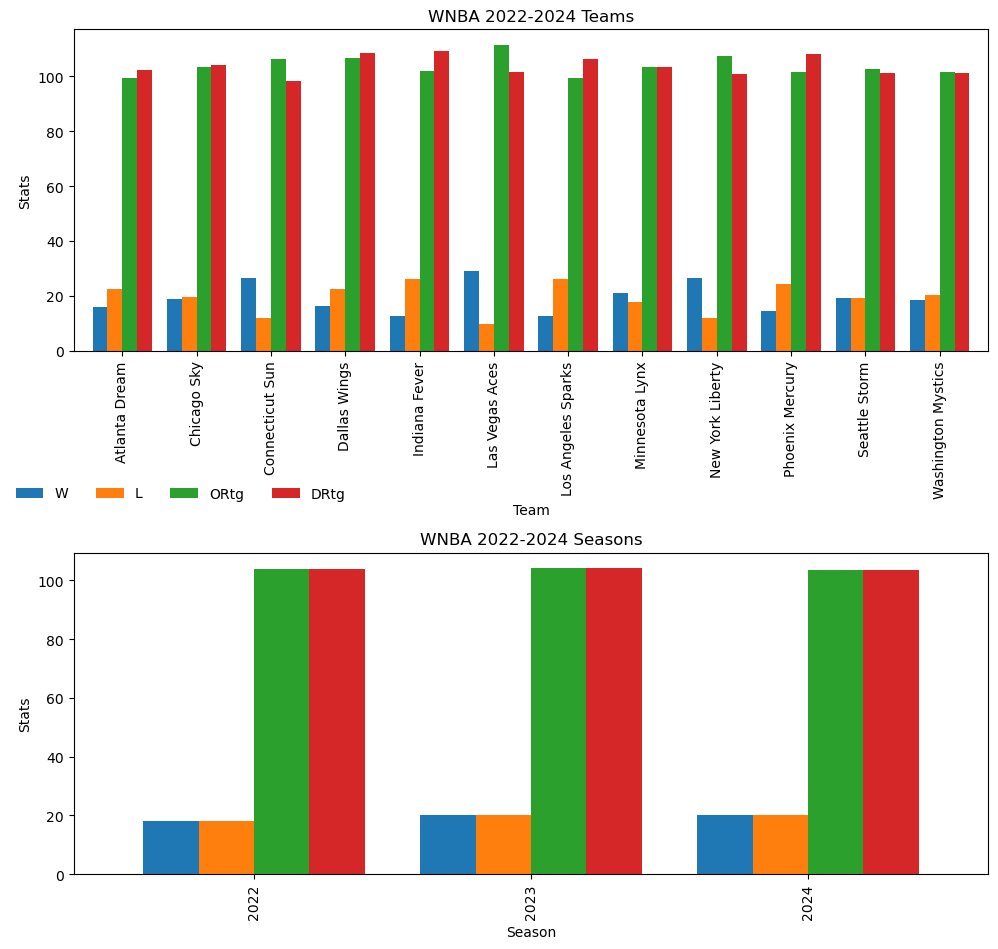

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned WNBA data
file_path = '/Users/lizvitai/Documents/PythonSports/wnba_advanced_stats_cleaned.csv'
df = pd.read_csv(file_path)

# Group by team and calculate mean for the chosen stats
team_grouped = df.groupby('Team').agg({
    'W': 'mean',
    'L': 'mean',
    'ORtg': 'mean',
    'DRtg': 'mean'
}).reset_index()

# Group by season and calculate mean for the chosen stats
season_grouped = df.groupby('Season').agg({
    'W': 'mean',
    'L': 'mean',
    'ORtg': 'mean',
    'DRtg': 'mean'
}).reset_index()

# Convert the Season to integers for cleaner display
season_grouped['Season'] = season_grouped['Season'].astype(int)

# Create subplots for team-level and season-level stats
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Plot for team-level stats
team_grouped.plot(x='Team', y=['W', 'L', 'ORtg', 'DRtg'], kind='bar', ax=axs[0], width=0.8);
axs[0].set_title('WNBA 2022-2024 Teams')
axs[0].set_xlabel('Team')
axs[0].set_ylabel('Stats')

# Plot for season-level stats
season_grouped.plot(x='Season', y=['W', 'L', 'ORtg', 'DRtg'], kind='bar', ax=axs[1], width=0.8);
axs[1].set_title('WNBA 2022-2024 Seasons')
axs[1].set_xlabel('Season')
axs[1].set_ylabel('Stats')

# Remove the individual legends from each subplot
axs[0].get_legend().remove()
axs[1].get_legend().remove()

# Add a single legend to be placed between the two graphs, left side of the first graph
fig.legend(['W', 'L', 'ORtg', 'DRtg'], loc='upper left', bbox_to_anchor=(0.0, 0.48), ncol=4, frameon=False)

# Adjust layout to avoid overlapping elements and give space for the legend
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Save the figure with the shared legend
plt.savefig('/Users/lizvitai/Documents/PythonSports/wnba_stats_plots_single_legend_between_graphs_no_decimal.pdf')

# Display the plot without extra output
plt.show()


In [3]:
import pandas as pd

# Load the combined WNBA data
file_path = '/Users/lizvitai/Documents/PythonSports/wnba_advanced_stats_combined.csv'
df = pd.read_csv(file_path)

# Drop the first row (header row)
df.columns = df.iloc[0]  # Set the second row as the header
df = df.drop([0])

# Remove rows with 'League Average'
df_cleaned = df[df['Team'] != 'League Average'].copy()

# Remove asterisks from team names to ensure only one entry per team
df_cleaned['Team'] = df_cleaned['Team'].str.replace('*', '', regex=False)

# Add the 'Season' column 
df_cleaned['Season'] = df_cleaned.iloc[:, -1]

# Reorder columns to have 'Season' right after 'Team'
df_cleaned = df_cleaned[['Rk', 'Team', 'Season'] + [col for col in df_cleaned.columns if col not in ['Rk', 'Team', 'Season']]]

# Reset index after cleaning
df_cleaned.reset_index(drop=True, inplace=True)

# Save the cleaned data to a new CSV
cleaned_file_path = '/Users/lizvitai/Documents/PythonSports/wnba_advanced_stats_cleaned.csv'
df_cleaned.to_csv(cleaned_file_path, index=False)

print(f"Cleaned data saved to {cleaned_file_path}")


Cleaned data saved to /Users/lizvitai/Documents/PythonSports/wnba_advanced_stats_cleaned.csv
